In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch 

from torch import nn
from classes import *

In [3]:
quantidade_camadas = 5
quantidade_neuronios = 200

In [4]:
model = DeepONet(
    [80] + (quantidade_camadas + 1) * [quantidade_neuronios],
    [1] + (quantidade_camadas + 1) * [quantidade_neuronios],
    torch.relu
)

module = Module_DeepONet(model, nn.MSELoss())
module.load_database('base dados/data10000.dat')
#module.trainning(10_000, 'model', 250, batch_size = 64, epochs = 1000, learning_rate = 1e-3, percent = 0.8)

In [5]:
module.evaluate()

np.float64(215.47422886341812)

In [6]:
model = DeepONet(
    [80] + (quantidade_camadas + 1) * [quantidade_neuronios],
    [1] + (quantidade_camadas + 1) * [quantidade_neuronios],
    torch.relu
)

model.load('model/model-1000.pt')
model = model.cpu()
module = Module_DeepONet(model, nn.MSELoss())

module.load_database('base dados/data5000.dat')
print(f'Erro: {module.evaluate()}')
pred, ref = module.get_results()

Erro: 0.9159027789393439


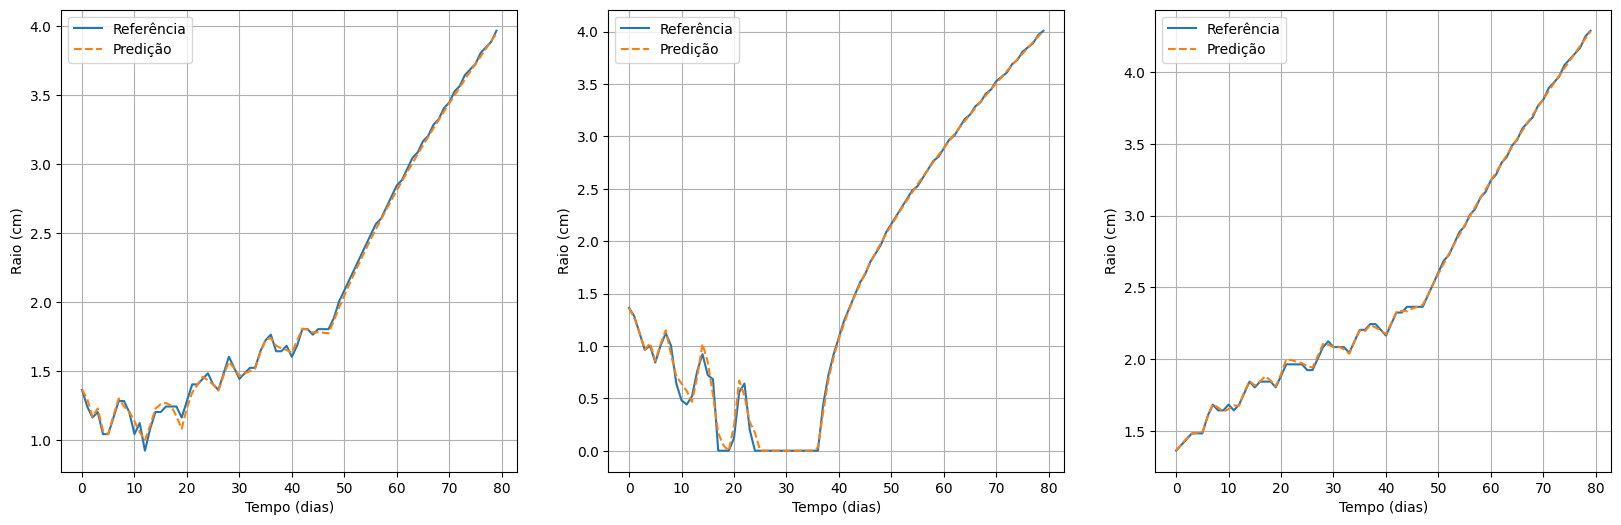

In [7]:
fig, ax = plt.subplots(ncols=3, figsize = (20, 6))

k = 10
for i in range(3):

    ax[i].plot(ref[k], label = 'Referência')
    ax[i].plot(pred[k], label = 'Predição', linestyle = 'dashed')

    #ax[i].set_title(f'Validação dos resultados')
    ax[i].set_xlabel('Tempo (dias)')
    ax[i].set_ylabel('Raio (cm)')

    ax[i].legend()
    ax[i].grid()

    k += 4



7.512677806516877e-06 1.0472643451066687e-05


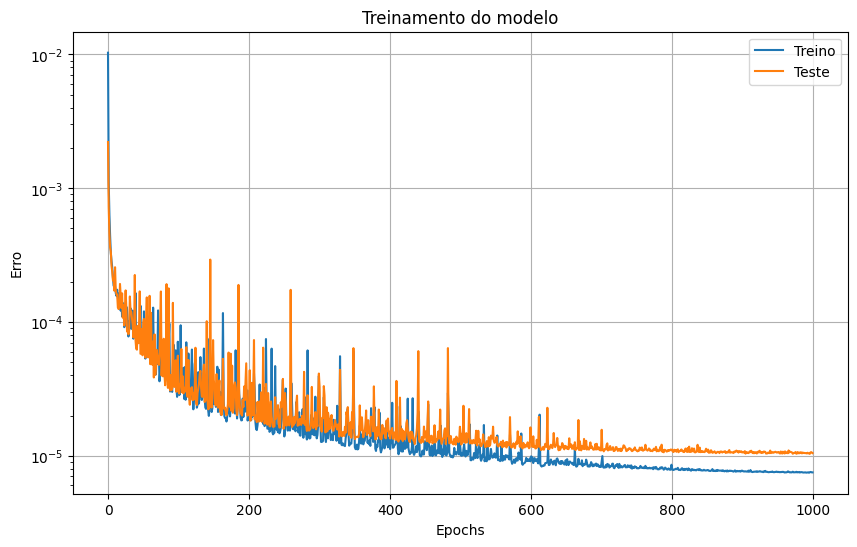

In [8]:
with open('model/trainning-1000.dat', 'rb') as arq: loss_history = np.load(arq)

print(loss_history[0][-1], loss_history[1][-1])

fig, ax = plt.subplots(figsize = (10, 6))

plt.plot(loss_history[0], label = 'Treino')
plt.plot(loss_history[1], label = 'Teste')

plt.title('Treinamento do modelo')
plt.xlabel('Epochs')
plt.ylabel('Erro')

plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

In [9]:
module.load_database('base dados/validacao.dat')
print(f'Erro: {module.evaluate()}')
pred, ref = module.get_results()

Erro: 2.6026093401014805


C:\Users\rique\AppData\Local\Temp\ipykernel_16672\3071279320.py:15: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[1].plot(abs(ref[i] - pred[i]))


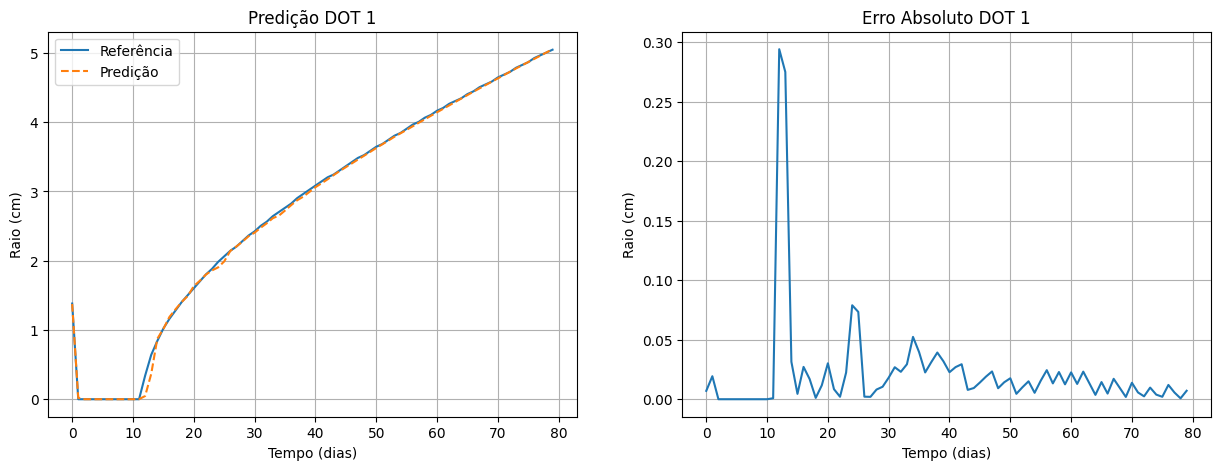

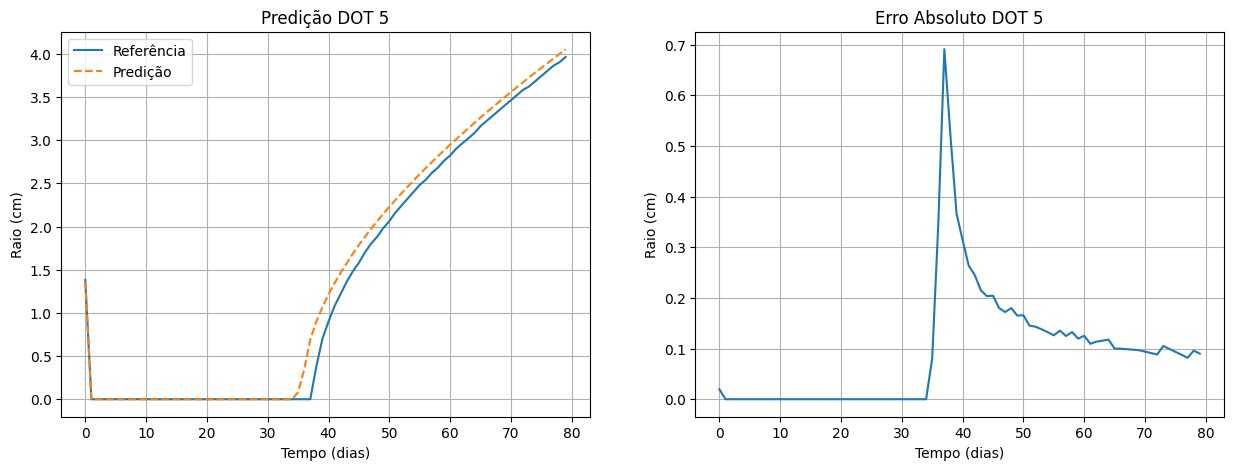

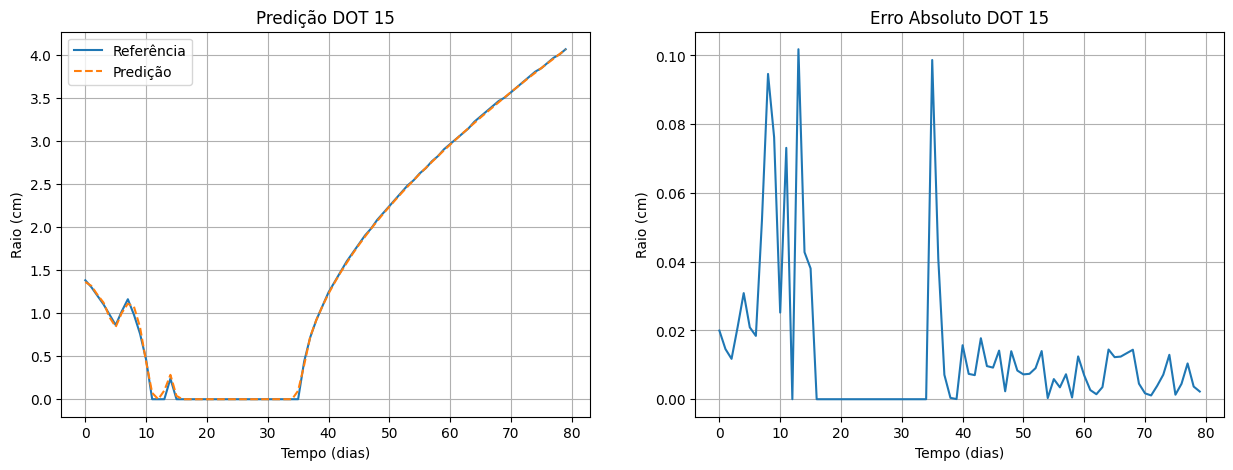

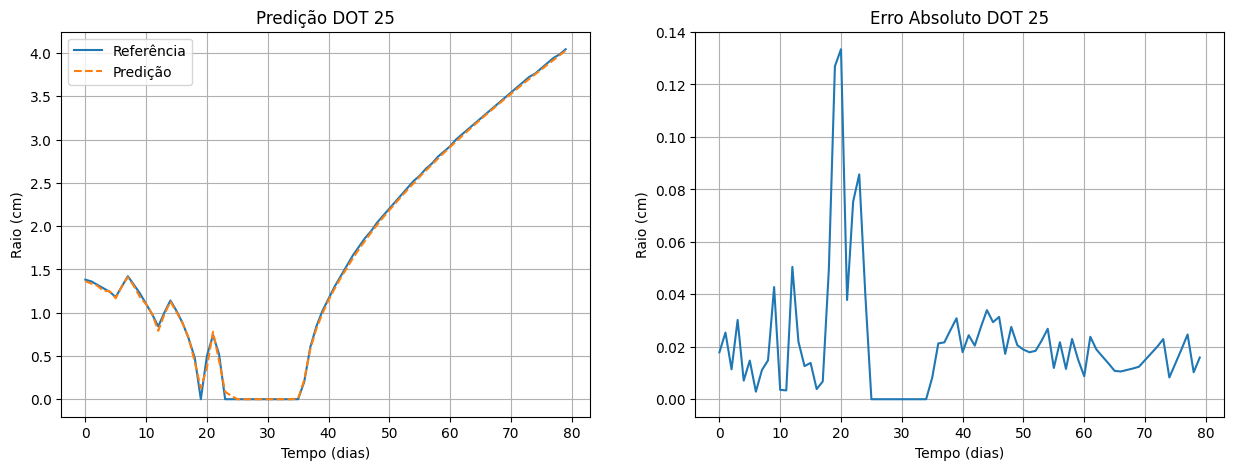

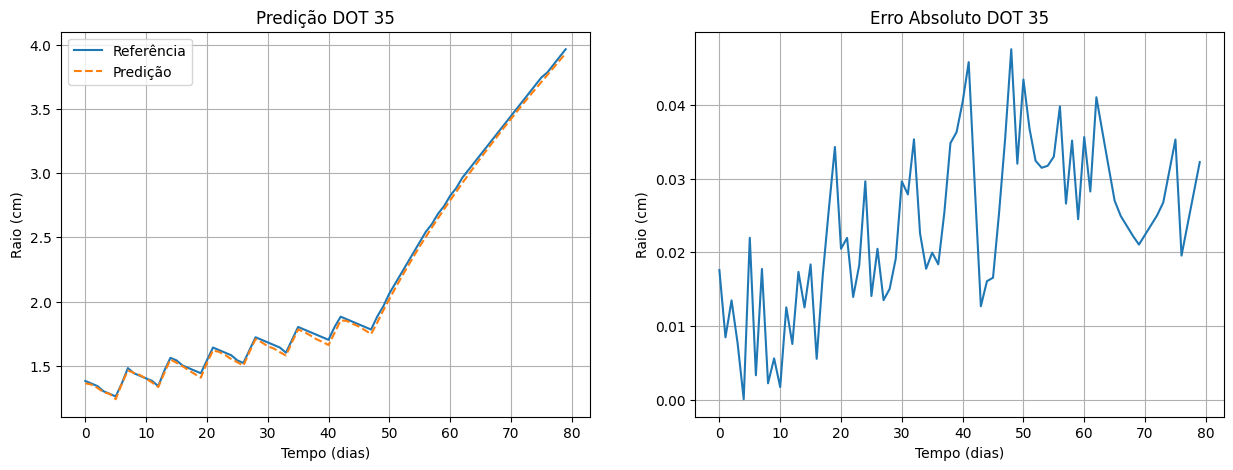

In [10]:
dot = [1, 5, 15, 25, 35]
for i in range(5):

    fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

    ax[0].plot(ref[i], label='Referência')
    ax[0].plot(pred[i], label='Predição', linestyle = 'dashed')
    ax[0].set_title(f'Predição DOT {dot[i]}')
    ax[0].grid()
    ax[0].legend()

    ax[0].set_xlabel('Tempo (dias)')
    ax[0].set_ylabel('Raio (cm)')

    ax[1].plot(abs(ref[i] - pred[i]))
    ax[1].set_title(f'Erro Absoluto DOT {dot[i]}')
    ax[1].grid()

    ax[1].set_xlabel('Tempo (dias)')
    ax[1].set_ylabel('Raio (cm)')

    plt.show()

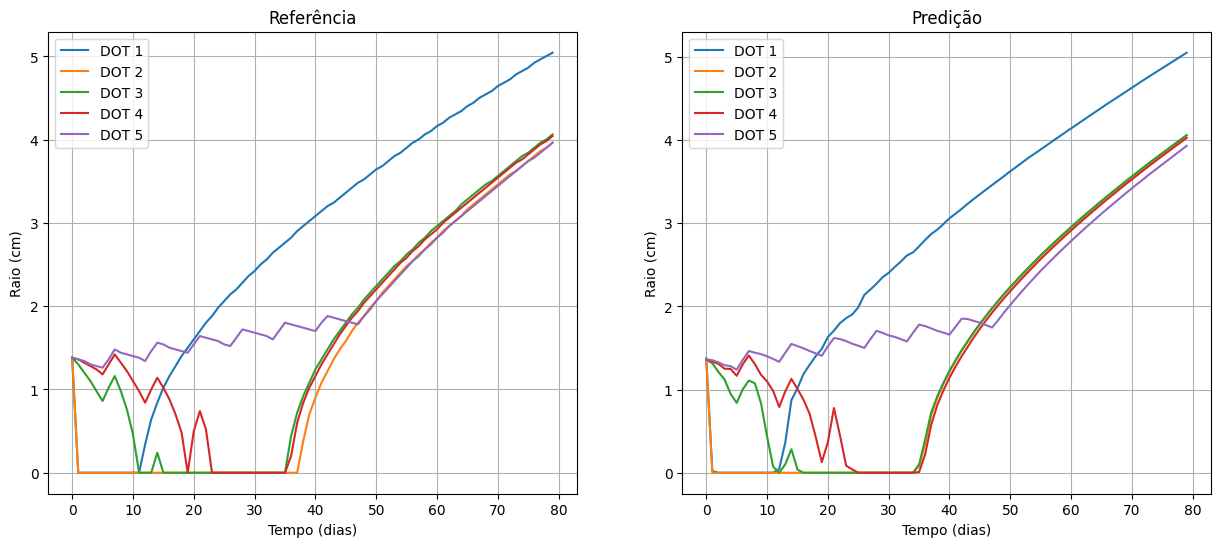

In [11]:

fig, ax = plt.subplots(ncols=2, figsize = (15, 6))

for i in range(5): ax[0].plot(ref[i], label = f'DOT {i+1}')
ax[0].grid()
ax[0].legend()
ax[0].set_title('Referência')
ax[0].set_xlabel('Tempo (dias)')
ax[0].set_ylabel('Raio (cm)')


for i in range(5): ax[1].plot(pred[i], label = f'DOT {i+1}')
ax[1].grid()
ax[1].legend()
ax[1].set_title('Predição')
ax[1].set_xlabel('Tempo (dias)')
ax[1].set_ylabel('Raio (cm)')

plt.show()

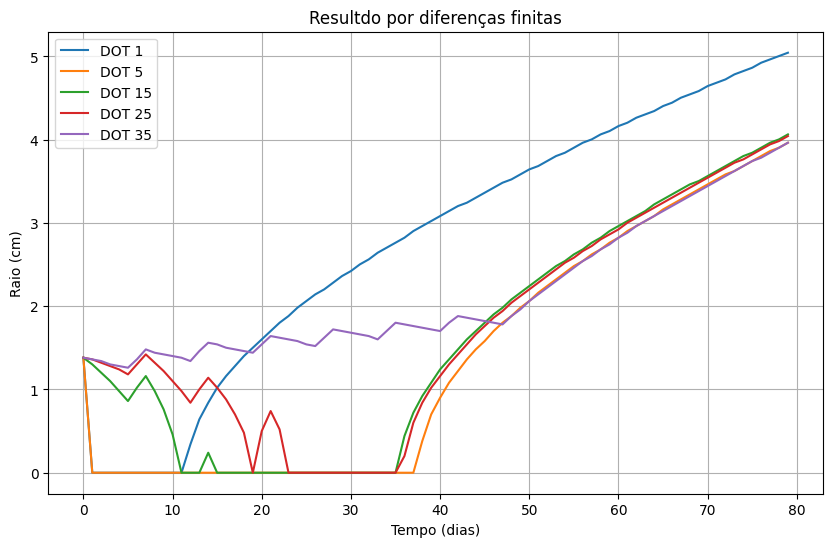

In [12]:
fig, ax = plt.subplots(figsize = (10, 6))

plt.plot(ref[0], label = 'DOT 1')
plt.plot(ref[1], label = 'DOT 5')
plt.plot(ref[2], label = 'DOT 15')
plt.plot(ref[3], label = 'DOT 25')
plt.plot(ref[4], label = 'DOT 35')


plt.title('Resultdo por diferenças finitas')
plt.xlabel('Tempo (dias)')
plt.ylabel('Raio (cm)')

plt.legend()
plt.grid()
plt.show()

In [13]:
with open('base dados/data5000.dat', 'rb') as arq: 
    
    _ = np.load(arq)
    branch2 = np.load(arq)

branch2[0]
print(f'branch: {branch2[0,2]:.4f}')

branch: 0.0305
